<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bar Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be provided to you in the form of an RDBMS.

You will use SQL queries to extract the necessary data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data

-   Visualize the relationship between two features

-   Visualize the composition of data

-   Visualize comparison of data


## Setup: Working with the Database
**Install the needed libraries**


In [1]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 186.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 195.3 MB/s eta 0:00:00


In [2]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 161.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 143.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 81.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 152.5 MB/s eta 0:00:00


**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [3]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head()


--2025-09-30 08:44:35--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  34.5MB/s    in 4.0s    

2025-09-30 08:44:40 (37.7 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Visualizing Data Distributions


##### 1. Histogram of `ConvertedCompYearly`


Visualize the distribution of yearly compensation (`ConvertedCompYearly`) using a histogram.



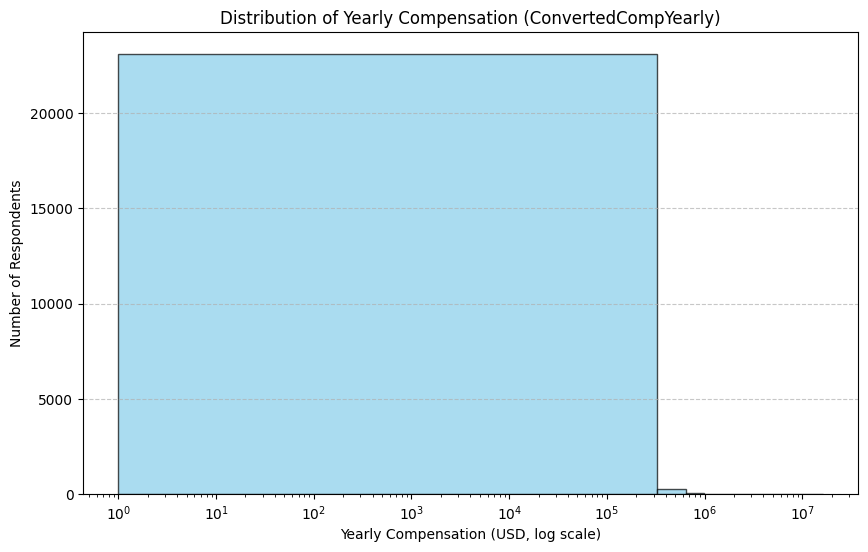

In [2]:
## Write your code here
# Drop missing values
df_comp = df.dropna(subset=["ConvertedCompYearly"]).copy()

# ---------- Histogram ----------
plt.figure(figsize=(10, 6))
plt.hist(df_comp["ConvertedCompYearly"], bins=50, color="skyblue", edgecolor="black", alpha=0.7)

plt.xscale("log")  # log scale to handle skewed data
plt.xlabel("Yearly Compensation (USD, log scale)")
plt.ylabel("Number of Respondents")
plt.title("Distribution of Yearly Compensation (ConvertedCompYearly)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

##### 2. Box Plot of `Age`


Since `Age` is categorical in the dataset, convert it to numerical values for a box plot.



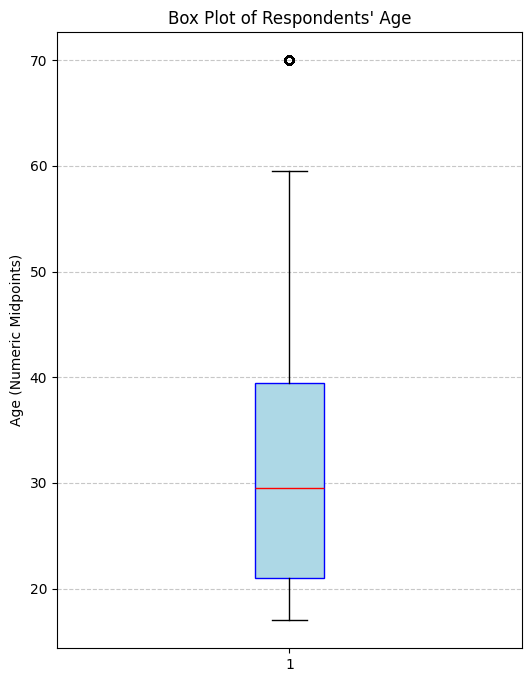

In [3]:
## Write your code here
# Map Age groups into numeric midpoints
age_map = {
    "Under 18 years old": 17,
    "18-24 years old": 21,
    "25-34 years old": 29.5,
    "35-44 years old": 39.5,
    "45-54 years old": 49.5,
    "55-64 years old": 59.5,
    "65 years or older": 70,
    "Prefer not to say": None
}
df["AgeNumeric"] = df["Age"].map(age_map)

# Drop missing numeric ages
df_age = df.dropna(subset=["AgeNumeric"])

# ---------- Box Plot ----------
plt.figure(figsize=(6, 8))
plt.boxplot(df_age["AgeNumeric"], vert=True, patch_artist=True,
            boxprops=dict(facecolor="lightblue", color="blue"),
            medianprops=dict(color="red"))

plt.ylabel("Age (Numeric Midpoints)")
plt.title("Box Plot of Respondents' Age")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

### Task 2: Visualizing Relationships in Data


##### 1. Scatter Plot of `Age_numeric` and `ConvertedCompYearly`


Explore the relationship between age and compensation.



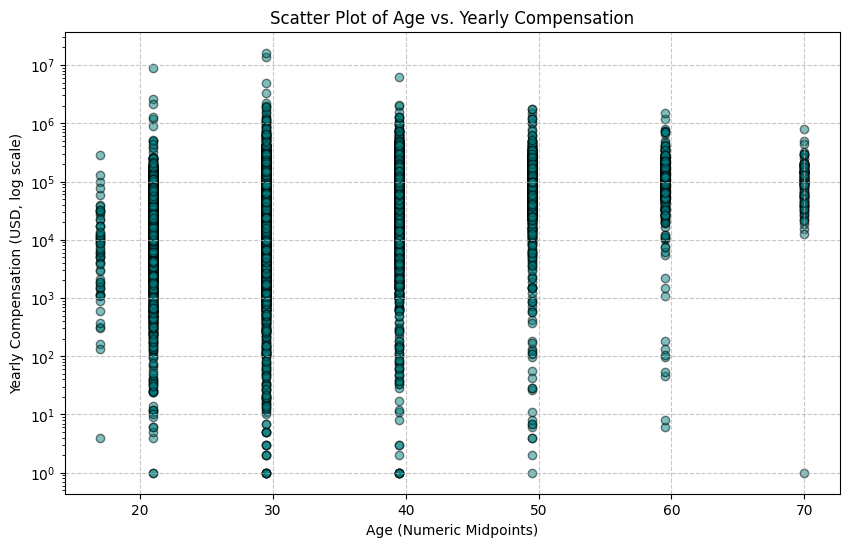

In [4]:
## Write your code here
df["AgeNumeric"] = df["Age"].map(age_map)

# Drop missing values
df_scatter = df.dropna(subset=["AgeNumeric", "ConvertedCompYearly"]).copy()

# ---------- Scatter Plot ----------
plt.figure(figsize=(10, 6))
plt.scatter(df_scatter["AgeNumeric"], df_scatter["ConvertedCompYearly"],
            alpha=0.5, color="teal", edgecolor="k")

plt.yscale("log")  # log scale to handle salary outliers
plt.xlabel("Age (Numeric Midpoints)")
plt.ylabel("Yearly Compensation (USD, log scale)")
plt.title("Scatter Plot of Age vs. Yearly Compensation")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


##### 2. Bubble Plot of `ConvertedCompYearly` and `JobSatPoints_6` with `Age_numeric` as Bubble Size


Explore how compensation and job satisfaction are related, with age as the bubble size.


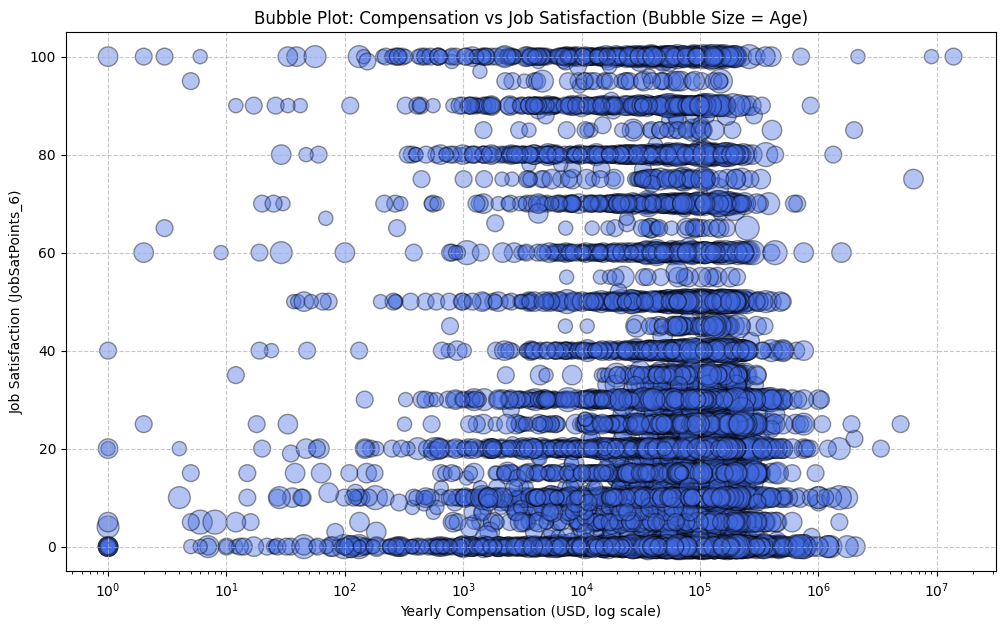

In [5]:
## Write your code here
df["AgeNumeric"] = df["Age"].map(age_map)

# Drop missing values
df_bubble = df.dropna(subset=["ConvertedCompYearly", "JobSatPoints_6", "AgeNumeric"]).copy()

# ---------- Bubble Plot ----------
plt.figure(figsize=(12, 7))
plt.scatter(
    df_bubble["ConvertedCompYearly"],
    df_bubble["JobSatPoints_6"],
    s=df_bubble["AgeNumeric"]*5,   # scale bubble size by age
    alpha=0.4,
    color="royalblue",
    edgecolor="k"
)

plt.xscale("log")  # log scale for compensation
plt.xlabel("Yearly Compensation (USD, log scale)")
plt.ylabel("Job Satisfaction (JobSatPoints_6)")
plt.title("Bubble Plot: Compensation vs Job Satisfaction (Bubble Size = Age)")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

### Task 3: Visualizing Composition of Data with Bar Charts


##### 1. Horizontal Bar Chart of `MainBranch` Distribution


Visualize the distribution of respondents’ primary roles to understand their professional focus.



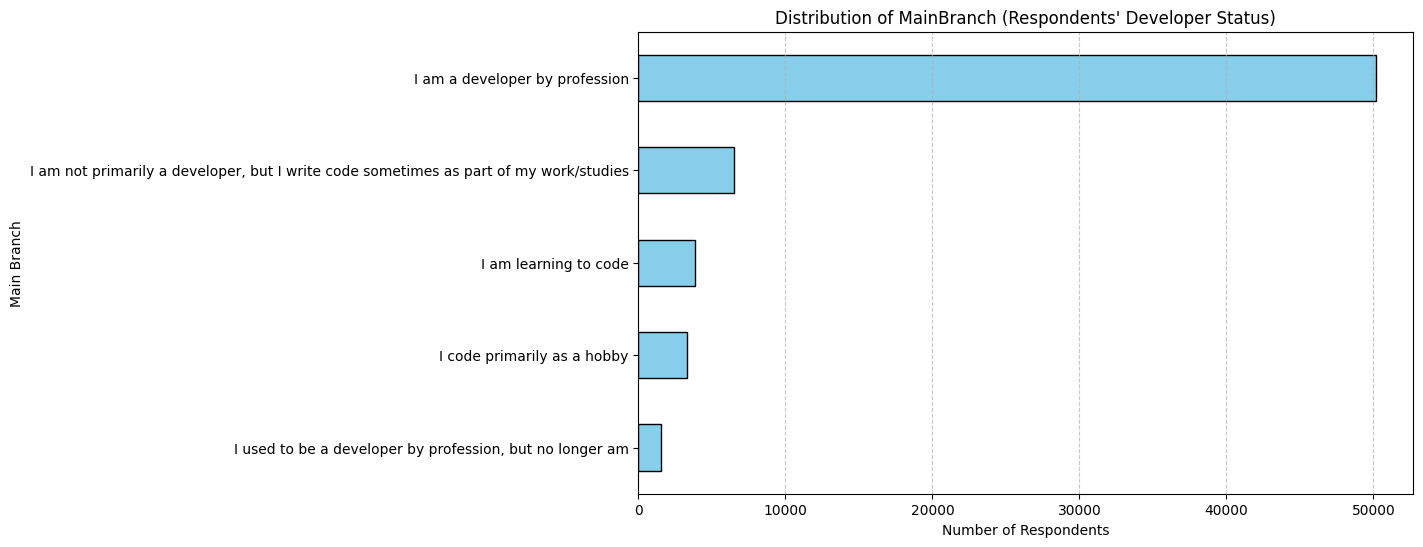

In [6]:
## Write your code here
# Drop missing values
df_branch = df.dropna(subset=["MainBranch"]).copy()

# Count occurrences of each MainBranch
branch_counts = df_branch["MainBranch"].value_counts()

# ---------- Horizontal Bar Chart ----------
plt.figure(figsize=(10, 6))
branch_counts.plot(kind="barh", color="skyblue", edgecolor="black")

plt.xlabel("Number of Respondents")
plt.ylabel("Main Branch")
plt.title("Distribution of MainBranch (Respondents' Developer Status)")
plt.gca().invert_yaxis()  # Highest count at the top
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()


##### 2. Vertical Bar Chart of Top 5 Programming Languages Respondents Want to Work With


Identify the most desired programming languages based on `LanguageWantToWorkWith`.



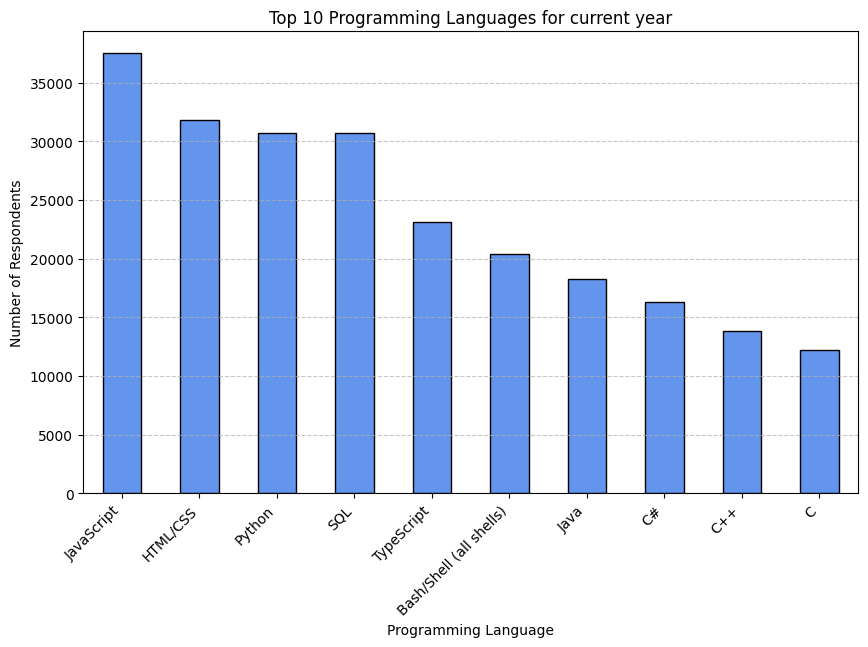

In [5]:
# Drop missing values
df_lang = df.dropna(subset=["LanguageHaveWorkedWith"]).copy()

# Split semicolon-separated languages
df_lang = df_lang.assign(
    LanguageHaveWorkedWith=df_lang["LanguageHaveWorkedWith"].str.split(";")
).explode("LanguageHaveWorkedWith")

# Clean whitespace
df_lang["LanguageHaveWorkedWith"] = df_lang["LanguageHaveWorkedWith"].str.strip()

# Count occurrences
lang_counts = df_lang["LanguageHaveWorkedWith"].value_counts().head(10)  # Top 10

# ---------- Vertical Bar Chart ----------
plt.figure(figsize=(10, 6))
lang_counts.plot(kind="bar", color="cornflowerblue", edgecolor="black")

plt.ylabel("Number of Respondents")
plt.xlabel("Programming Language")
plt.title("Top 10 Programming Languages for current year")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

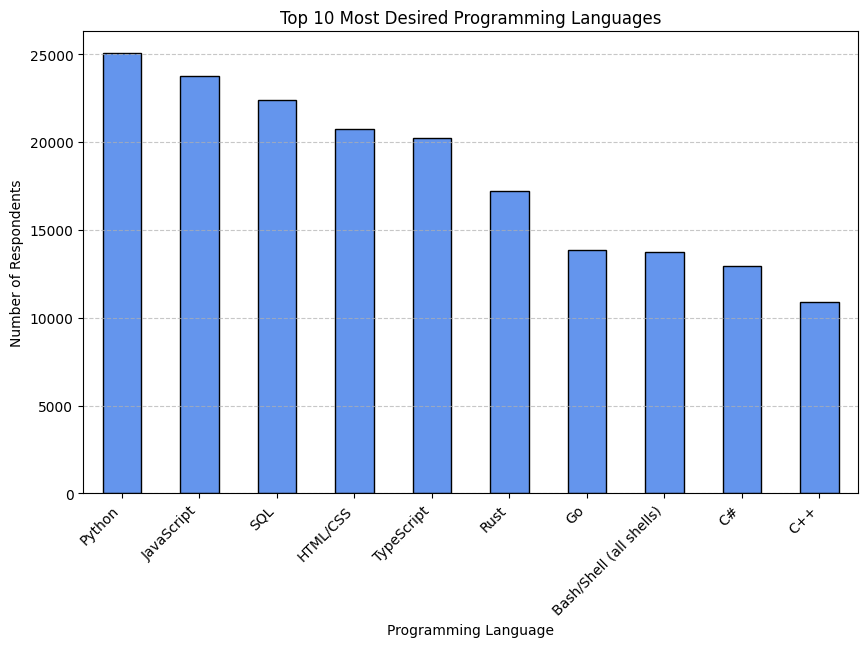

In [7]:
## Write your code here
# Drop missing values
df_lang = df.dropna(subset=["LanguageWantToWorkWith"]).copy()

# Split semicolon-separated languages
df_lang = df_lang.assign(
    LanguageWantToWorkWith=df_lang["LanguageWantToWorkWith"].str.split(";")
).explode("LanguageWantToWorkWith")

# Clean whitespace
df_lang["LanguageWantToWorkWith"] = df_lang["LanguageWantToWorkWith"].str.strip()

# Count occurrences
lang_counts = df_lang["LanguageWantToWorkWith"].value_counts().head(10)  # Top 10

# ---------- Vertical Bar Chart ----------
plt.figure(figsize=(10, 6))
lang_counts.plot(kind="bar", color="cornflowerblue", edgecolor="black")

plt.ylabel("Number of Respondents")
plt.xlabel("Programming Language")
plt.title("Top 10 Most Desired Programming Languages")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

##### 3. Stacked Bar Chart of Median `JobSatPoints_6` and `JobSatPoints_7` by Age Group


Compare job satisfaction metrics across different age groups with a stacked bar chart.


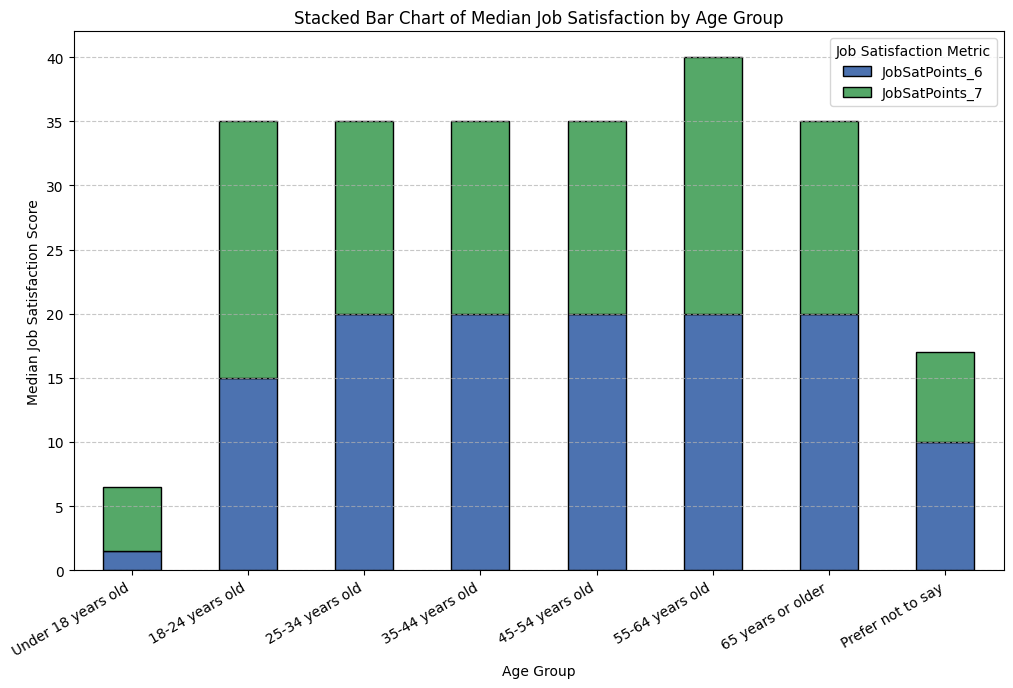

In [8]:
## Write your code here
# Drop missing values
df_job = df.dropna(subset=["Age", "JobSatPoints_6", "JobSatPoints_7"]).copy()

# Compute median JobSat by Age group
median_sat = df_job.groupby("Age")[["JobSatPoints_6", "JobSatPoints_7"]].median().reset_index()

# Define age order
age_order = [
    "Under 18 years old",
    "18-24 years old",
    "25-34 years old",
    "35-44 years old",
    "45-54 years old",
    "55-64 years old",
    "65 years or older",
    "Prefer not to say"
]

# Ensure proper order
median_sat["Age"] = pd.Categorical(median_sat["Age"], categories=age_order, ordered=True)
median_sat = median_sat.sort_values("Age")

# ---------- Stacked Bar Chart ----------
median_sat.set_index("Age")[["JobSatPoints_6", "JobSatPoints_7"]].plot(
    kind="bar",
    stacked=True,
    figsize=(12, 7),
    color=["#4C72B0", "#55A868"],
    edgecolor="black"
)

plt.xlabel("Age Group")
plt.ylabel("Median Job Satisfaction Score")
plt.title("Stacked Bar Chart of Median Job Satisfaction by Age Group")
plt.xticks(rotation=30, ha="right")
plt.legend(title="Job Satisfaction Metric")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

##### 4. Bar Chart of Database Popularity (`DatabaseHaveWorkedWith`)


Identify the most commonly used databases among respondents by visualizing `DatabaseHaveWorkedWith`.



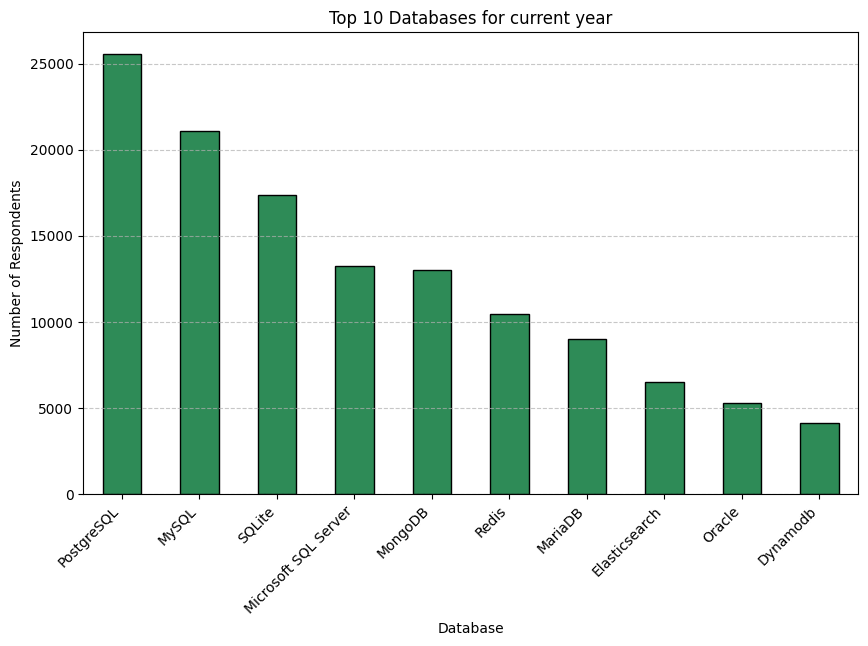

In [8]:
## Write your code here
# Drop missing values
df_db = df.dropna(subset=["DatabaseHaveWorkedWith"]).copy()

# Split semicolon-separated databases
df_db = df_db.assign(
    DatabaseHaveWorkedWith=df_db["DatabaseHaveWorkedWith"].str.split(";")
).explode("DatabaseHaveWorkedWith")

# Clean whitespace
df_db["DatabaseHaveWorkedWith"] = df_db["DatabaseHaveWorkedWith"].str.strip()

# Count database mentions
db_counts = df_db["DatabaseHaveWorkedWith"].value_counts().head(10)  # Top 10

# ---------- Bar Chart ----------
plt.figure(figsize=(10, 6))
db_counts.plot(kind="bar", color="seagreen", edgecolor="black")

plt.ylabel("Number of Respondents")
plt.xlabel("Database")
plt.title("Top 10 Databases for current year")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

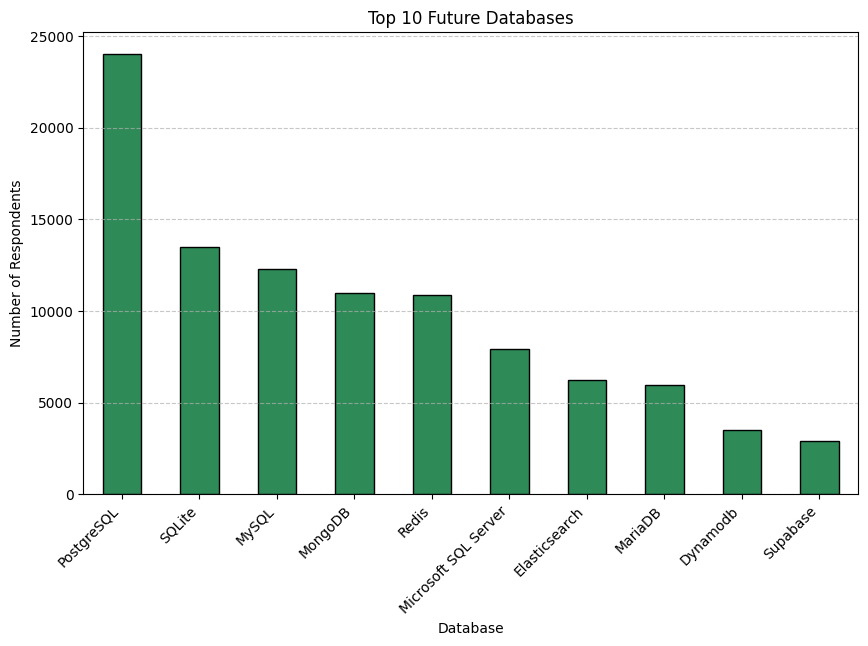

In [6]:
# Drop missing values
df_db = df.dropna(subset=["DatabaseWantToWorkWith"]).copy()

# Split semicolon-separated databases
df_db = df_db.assign(
    DatabaseWantToWorkWith=df_db["DatabaseWantToWorkWith"].str.split(";")
).explode("DatabaseWantToWorkWith")

# Clean whitespace
df_db["DatabaseWantToWorkWith"] = df_db["DatabaseWantToWorkWith"].str.strip()

# Count database mentions
db_counts = df_db["DatabaseWantToWorkWith"].value_counts().head(10)  # Top 10

# ---------- Bar Chart ----------
plt.figure(figsize=(10, 6))
db_counts.plot(kind="bar", color="seagreen", edgecolor="black")

plt.ylabel("Number of Respondents")
plt.xlabel("Database")
plt.title("Top 10 Future Databases")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

### Task 4: Visualizing Comparison of Data with Bar Charts


##### 1. Grouped Bar Chart of Median `ConvertedCompYearly` for Different Age Groups


Compare median compensation across multiple age groups with a grouped bar chart.



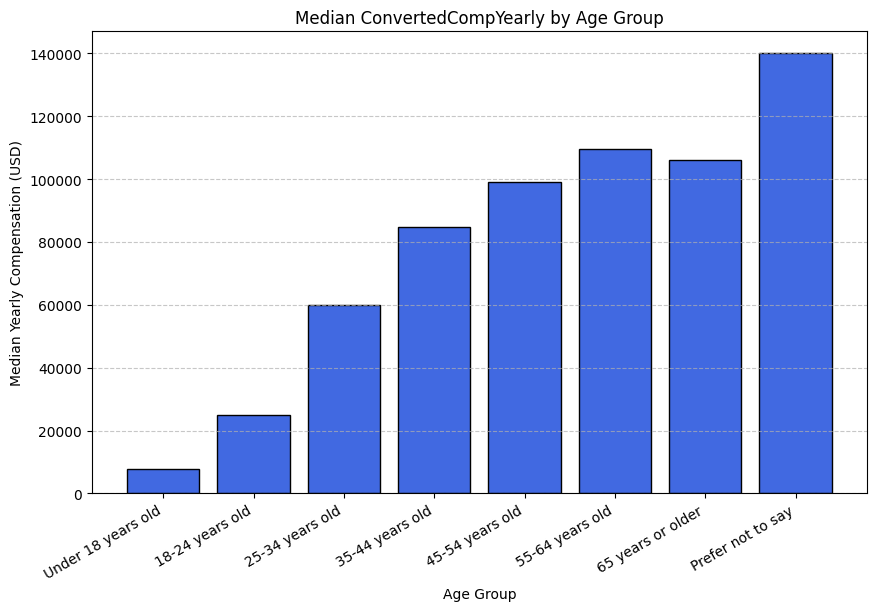

In [10]:
## Write your code here
# Drop missing values
df_age = df.dropna(subset=["Age", "ConvertedCompYearly"]).copy()

# Compute median compensation by Age group
median_comp = df_age.groupby("Age")["ConvertedCompYearly"].median().reset_index()

# Define correct age group order
age_order = [
    "Under 18 years old",
    "18-24 years old",
    "25-34 years old",
    "35-44 years old",
    "45-54 years old",
    "55-64 years old",
    "65 years or older",
    "Prefer not to say"
]

# Ensure proper ordering
median_comp["Age"] = pd.Categorical(median_comp["Age"], categories=age_order, ordered=True)
median_comp = median_comp.sort_values("Age")

# ---------- Grouped Bar Chart ----------
plt.figure(figsize=(10, 6))
plt.bar(median_comp["Age"], median_comp["ConvertedCompYearly"], color="royalblue", edgecolor="black")

plt.xlabel("Age Group")
plt.ylabel("Median Yearly Compensation (USD)")
plt.title("Median ConvertedCompYearly by Age Group")
plt.xticks(rotation=30, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

##### 2. Bar Chart of Respondent Count by Country


Show the distribution of respondents by country to see which regions are most represented.



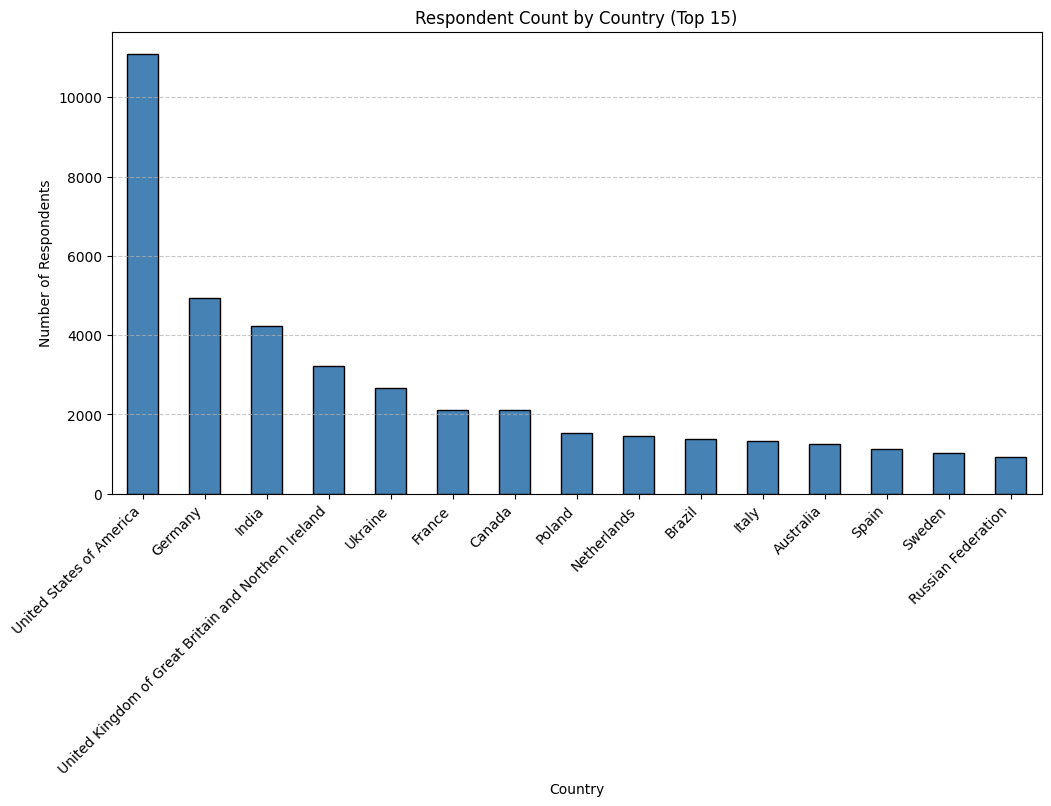

In [11]:
## Write your code here
# Drop missing values
df_country = df.dropna(subset=["Country"]).copy()

# Count respondents per country
country_counts = df_country["Country"].value_counts().head(15)  # Top 15 countries

# ---------- Bar Chart ----------
plt.figure(figsize=(12, 6))
country_counts.plot(kind="bar", color="steelblue", edgecolor="black")

plt.ylabel("Number of Respondents")
plt.xlabel("Country")
plt.title("Respondent Count by Country (Top 15)")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

### Final Step: Review


This lab demonstrates how to create and interpret different types of bar charts, allowing you to analyze the composition, comparison, and distribution of categorical data in the Stack Overflow dataset, including main professional branches, programming language preferences, and compensation by age group. Bar charts effectively compare counts and median values across various categories.


## Summary


After completing this lab, you will be able to:
- Create a horizontal bar chart to visualize the distribution of respondents' primary roles, helping to understand their professional focus.
- Develop a vertical bar chart to identify the most desired programming languages based on the LanguageWantToWorkWith variable.
- Use a stacked bar chart to compare job satisfaction metrics across different age groups.
- Create a bar chart to visualize the most commonly used databases among respondents using the DatabaseHaveWorkedWith variable.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
